In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import pickle

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='paper')

from masterthesis.utils import CEFR_LABELS, ROUND_CEFR_LABELS, heatmap, IMG_DIR, RESULTS_DIR

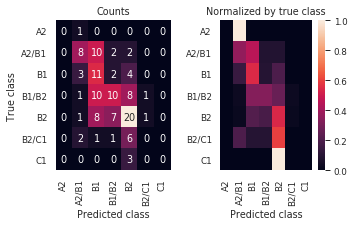

In [3]:
r = pickle.load((RESULTS_DIR / 'mlp_mixed-02-20_14-45-16.pkl').open('rb'))

fig, axes = plt.subplots(1, 2)
fig.set_size_inches(5, 3)
cm = confusion_matrix(y_pred=r.predictions, y_true=r.true)
ax1 = sns.heatmap(cm, annot=True, square=False, cbar=False, ax=axes[0])
ax1.set_xticklabels(CEFR_LABELS)
ax1.set_yticklabels(CEFR_LABELS, rotation=0)
ax1.set_title('Counts')

cm = cm / cm.sum(axis=1, keepdims=True)

ax2 = sns.heatmap(cm, annot=False, square=False, cbar=True, ax=axes[1])
ax2.set_xticklabels(CEFR_LABELS)
ax2.set_yticklabels(CEFR_LABELS, rotation=0)
ax2.set_title('Normalized by true class')
ax1.set_xlabel('Predicted class')
ax1.set_ylabel('True class')
ax2.set_xlabel('Predicted class')
plt.tight_layout()
plt.setp(ax1.get_xticklabels(), rotation=90);
plt.setp(ax2.get_xticklabels(), rotation=90);
#plt.savefig(str(IMG_DIR / 'mlp-mixed-conf.pdf'), bbox_inches='tight')

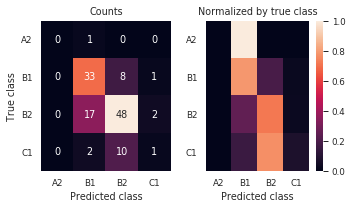

In [4]:
r = pickle.load((RESULTS_DIR / 'mlp_mixed-02-22_13-43-37.pkl').open('rb'))

fig, axes = plt.subplots(1, 2)
fig.set_size_inches(5, 3)

cm = confusion_matrix(y_pred=r.predictions, y_true=r.true)
ax1 = sns.heatmap(cm, annot=True, square=False, cbar=False, ax=axes[0])
ax1.set_xticklabels(ROUND_CEFR_LABELS)
ax1.set_yticklabels(ROUND_CEFR_LABELS, rotation=0)
ax1.set_title('Counts')

cm = cm / cm.sum(axis=1, keepdims=True)

ax2 = sns.heatmap(cm, annot=False, square=False, cbar=True, ax=axes[1])
ax2.set_xticklabels(ROUND_CEFR_LABELS)
ax2.set_yticklabels(ROUND_CEFR_LABELS, rotation=0)
ax2.set_title('Normalized by true class')
ax1.set_xlabel('Predicted class')
ax1.set_ylabel('True class')
ax2.set_xlabel('Predicted class')
plt.tight_layout()
#plt.savefig(str(IMG_DIR / 'mlp-mixed-conf-round.pdf'), bbox_inches='tight')